<a href="https://colab.research.google.com/github/nhattan206/AI_project/blob/main/Kinematic3DOF(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import cos, sin, pi
from pandas import DataFrame
import numpy as np
theta1 = []
theta2 = []
theta3 = []
px = []
py = []
Si = []
l1 = 50
l2 = 40
l3 = 20
for t1 in range (0,90):
    for t2 in range (0,180):
        for t3 in range (0,180):
            theta1.append(t1)
            theta2.append(t2)
            theta3.append(t3)
            px.append(round(l1*cos(t1*pi/180) + l2*cos((t1+t2)*pi/180) + l3*cos((t1+t2+t3)*pi/180),2))
            py.append(round(l1*sin(t1*pi/180) + l2*sin((t1+t2)*pi/180) + l3*sin((t1+t2+t3)*pi/180),2))
            Si.append(t1+t2+t3)
df = DataFrame(np.c_[theta1,theta2,theta3,px,py,Si],columns = ['theta1','theta2','theta3','px','py','Si'])
export_csv = df.to_csv (r'Kinematic3DOF(ANN).csv', index = None, header=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
url = 'Kinematic3DOF(ANN).csv'
data = pd.read_csv(url)
print(data)
data_x = data.drop(data.columns[:3], axis = 1)
print(data_x)
X = data_x.values.tolist()
data_y = data.drop(data.columns[3:], axis = 1)
print(data_y)
Y = data_y.values.tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

         theta1  theta2  theta3      px     py     Si
0           0.0     0.0     0.0  110.00   0.00    0.0
1           0.0     0.0     1.0  110.00   0.35    1.0
2           0.0     0.0     2.0  109.99   0.70    2.0
3           0.0     0.0     3.0  109.97   1.05    3.0
4           0.0     0.0     4.0  109.95   1.40    4.0
...         ...     ...     ...     ...    ...    ...
2915995    89.0   179.0   175.0    1.91  29.87  443.0
2915996    89.0   179.0   176.0    1.57  29.91  444.0
2915997    89.0   179.0   177.0    1.22  29.94  445.0
2915998    89.0   179.0   178.0    0.87  29.97  446.0
2915999    89.0   179.0   179.0    0.52  29.99  447.0

[2916000 rows x 6 columns]
             px     py     Si
0        110.00   0.00    0.0
1        110.00   0.35    1.0
2        109.99   0.70    2.0
3        109.97   1.05    3.0
4        109.95   1.40    4.0
...         ...    ...    ...
2915995    1.91  29.87  443.0
2915996    1.57  29.91  444.0
2915997    1.22  29.94  445.0
2915998    0.87  29.97  

In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_train = X_train.data.tolist()

X_test = standard_scaler.fit_transform(X_test)
X_test = X_test.data.tolist()

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,435
Trainable params: 2,435
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
14580/14580 [==============================] - 65s 4ms/step - loss: 184.3261 - mean_absolute_error: 5.9825 - val_loss: 18.6444 - val_mean_absolute_error: 2.9626
Epoch 2/128
14580/14580 [==============================] - 48s 3ms/step - loss: 14.7083 - mean_absolute_error: 2.5934 - val_loss: 12.4849 - val_m

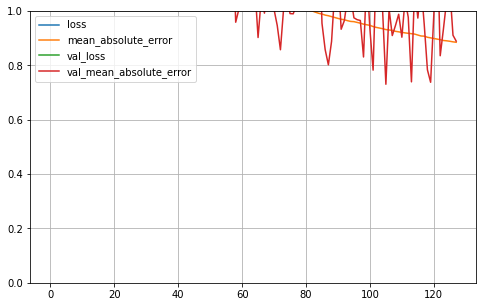

In [ ]:
#Model
model = Sequential()
model.add(Dense(64, activation='relu',kernel_initializer='normal', input_shape = (3,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(3))
model.summary()
#Bien dich
model.compile(loss='mse', optimizer =RMSprop(), metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 128,verbose = 1, validation_split=0.2)
#Save model
model.save('Kinematic3DOF.h5')
#Danh gia
score = model.evaluate(X_test, Y_test, verbose=0)
print('Sai số:', score[0])
print('mean_absolute_error', score[1])
#Do thi
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()